# Анализ аренды самокатов

**Описание проекта**

Нам были предоставлены данные о некоторых пользователях популярного сервиса аренды самокатов GoFast из нескольких городов, а также об их поездках. Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

*без подписки* 

    абонентская плата отсутствует;
    стоимость одной минуты поездки — 8 рублей;
    стоимость старта (начала поездки) — 50 рублей;
    
*с подпиской Ultra*

    абонентская плата — 199 рублей в месяц;
    стоимость одной минуты поездки — 6 рублей;
    стоимость старта — бесплатно.
    
**Цель проекта**

Проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.

**План работы**

    - Загрузка данных
    - Предобработка данных
    - Исследовательский анализ данных
    - Объединение данных
    - Подсчёт выручки
    - Проверка гипотез

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from scipy import stats as st

#### Шаг 1. Загрузка данных

Прочитаем файл *'users_go.csv'* из папки /datasets, сохранив его в датафрейм *users_go*. Выведем на экран первые 5 строк датафрейма и общую информацию о нем.

In [2]:
#считываем файл users_go.csv и выводим первые пять строк на экран
users_go = pd.read_csv('/datasets/users_go.csv')
users_go.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [3]:
#выводим общую информацию о users_go
users_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


По общей информации о данном датафрейме можно сказать, что пропусков нет, типы данных соответствуют ожидаемым.

Прочитаем файл *'rides_go.csv'* из папки */datasets*, сохранив его в датафрейм *rides_go*. Выведем на экран первые 5 строк датафрейма и общую информацию о нем.

In [4]:
#считываем файл rides_go.csv и выводим первые пять строк на экран
rides_go = pd.read_csv('/datasets/rides_go.csv')
rides_go.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [5]:
#выводим общую информацию о rides_go
rides_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


Из общей информации видно, что пропусков в датафрейме нет, но у столбца *date* тип данных *object*, для стобцов с датами тип данных должен быть *datetime64*.

Прочитаем файл *'subscriptions_go.csv'* из папки */datasets*, сохранив его в датафрейм *subscriptions_go*. Выведем на экран первые 5 строк датафрейма и общую информацию о нем.

In [6]:
#считываем файл subscriptions_go.csv и выводим первые пять строк на экран
subscriptions_go = pd.read_csv('/datasets/subscriptions_go.csv')
subscriptions_go.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [7]:
#выводим общую информацию о subscriptions_go
subscriptions_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


В датафрейме с описанием подписок отсутствуют пропуски и типы данных столбцов корректные.

#### Шаг 2. Предобработка данных

В предыдущем пункте мы выяснили, что один столбец имеет некорректный тип данных. Приведем столбец date к типу даты pandas.

In [8]:
#приведем столбец date к типу даты pandas, выведем первые 5 строчек на экран и общую информацию для проверки
rides_go['date'] = pd.to_datetime(rides_go['date'], format='%Y-%m-%d')
display(rides_go.head())
display(rides_go.info())

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


None

Тип данных столбца успешно поменяли. создадим новый столбец с номером месяца на основе столбца date. 

Создадим новый столбец с номером месяца на основе столбца date, но перед этим проверим за какой период данные в датасете, так как если данные за несколько лет, то номера месяцев будут в разных годах одинаковые.

In [9]:
display(rides_go['date'].min())
display(rides_go['date'].max())

Timestamp('2021-01-01 00:00:00')

Timestamp('2021-12-30 00:00:00')

То есть в работе мы используем данные за 2021 год.

In [10]:
#создадим новый столбец month с номером месяца и выведем первые 5 строчек на экран
rides_go['month'] = pd.DatetimeIndex(rides_go['date']).month
rides_go.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


Проверим наличие дубликатов в датафреймах. Поcчитаем количество явных дубликатов в таблицах *users_go* и *rides_go*  и удалим, если такие есть.

In [11]:
#найдем количество явных дубликатов в таблице users_go
users_go.duplicated().sum()

31

В таблице users_go 31 дубликат, удалим их.

In [12]:
#удалим явные дубликаты и снова посчитаем их количество
users_go = users_go.drop_duplicates()
users_go.duplicated().sum()

0

In [13]:
#найдем количество явных дубликатов в таблице rides_go
rides_go.duplicated().sum()

0

В таблице rides_go дубликатов нет. Из трех таблиц неявные дубликаты могут быть в таблице *users_go* в столбце *city* . Выведем все уникальные значения этого столбца.

In [14]:
#выведем уникальные значения столбца city
users_go['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

Неявные дубликаты отсутствуют.

In [15]:
# Комментарий ревьюера
temp = rides_go.copy() # Создаем копию, что бы не изменять текущий датасет
display(temp['distance'].head(3))
# Округление расстояния
temp['distance'] = temp['distance'].round(2)
temp['distance'].head(3)

0    4409.919140
1    2617.592153
2     754.159807
Name: distance, dtype: float64

0    4409.92
1    2617.59
2     754.16
Name: distance, dtype: float64

Видим, что расстояние поездки имеет формат до шести знаков после точки, округлить расстояния до двух знаков после точки.

In [16]:
#округлим значения расстояния и выведем первые 5 строчек на экран
rides_go['distance'] = rides_go['distance'].round(2)
rides_go['distance'].head()

0    4409.92
1    2617.59
2     754.16
3    2694.78
4    4028.69
Name: distance, dtype: float64

#### Шаг 3. Исследовательский анализ данных

##### Частота встречаемости городов

Визуализируем частоту встречаемости городов

In [18]:
#найдем частотность городов
users_go['city'].value_counts()

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

По выводу видим, что чаще всего брали самокаты в Пятигорске - этот город в таблице встречается 226 раз, реже всего в Москве - 172 раза. Теперь посчитаем доли встречаемости городов от общего объема и построим столбчатую диаграмму по этому параметру.

In [19]:
#найдем доли встречаемости городов от общего объема
users_go['city'].value_counts(normalize = True)

Пятигорск         0.142764
Екатеринбург      0.132986
Ростов-на-Дону    0.129074
Краснодар         0.125815
Сочи              0.123207
Омск              0.119296
Тюмень            0.117340
Москва            0.109518
Name: city, dtype: float64

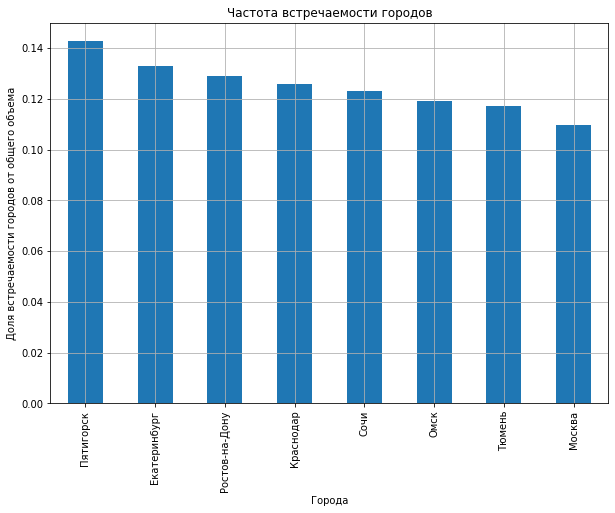

In [20]:
#построим диаграмму встречаемости городов
users_go['city'].value_counts(normalize = True).plot(kind='bar', grid='True', figsize=(10, 7))
plt.title('Частота встречаемости городов')
plt.xlabel('Города')
plt.ylabel('Доля встречаемости городов от общего объема')
plt.show()

##### Cоотношение пользователей с подпиской и без подписки

Найдем доли количества пользователей с подпиской и без подписки от общего объема и построим диаграмму. 

In [21]:
#найдем доли количества пользователей с подпиской и без подписки от общего объема
users_go['subscription_type'].value_counts(normalize = True)

free     0.544329
ultra    0.455671
Name: subscription_type, dtype: float64

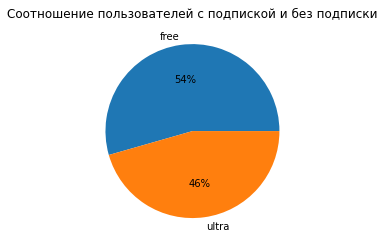

In [24]:
temp = users_go.copy()
temp['subscription_type'].value_counts().plot(
    kind= 'pie',
    title= 'Соотношение пользователей с подпиской и без подписки',
    autopct = "%.0f%%",
    ylabel= ""
)
plt.show()

Количество пользователей без подписки немного больше чем с подпиской, пользователи без подписки составляют 54 % от всех пользователей, пользователи с подпиской - 46 %. Найдем отношение количества пользователей с подпиской к пользователям без подписки.

In [23]:
# найдем отношение количества пользователей с подпиской к пользователям без подписки
users_go[users_go['subscription_type'] == 'ultra']['subscription_type'].count() / users_go[users_go['subscription_type'] == 'free']['subscription_type'].count()

0.837125748502994

##### Возраст пользователей

Построим гистограмму по возрасту пользователей, а также диаграмму размаха  и описательную статистику по этому параметру.

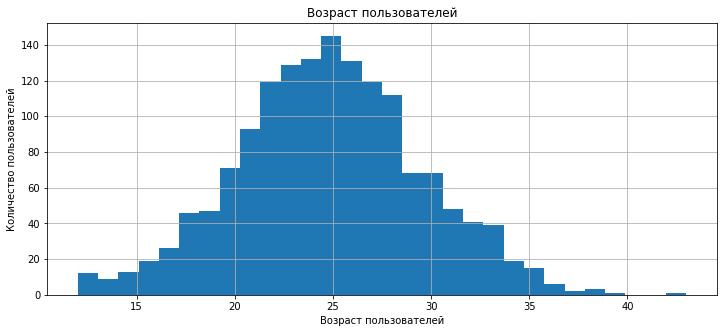

In [25]:
#построим гистограмму
users_go['age'].hist(bins=30, figsize=(12, 5))
plt.title('Возраст пользователей')
plt.xlabel('Возраст пользователей')
plt.ylabel('Количество пользователей')
plt.show()

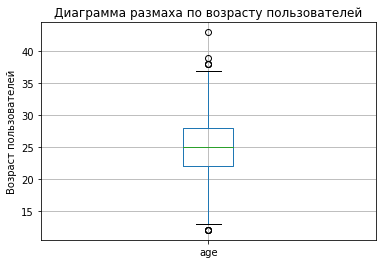

In [26]:
#построим диаграмму размаха 
users_go.boxplot('age')
plt.title('Диаграмма размаха по возрасту пользователей')
plt.ylabel('Возраст пользователей')
plt.show()

In [27]:
#выведеим описательную статистику
users_go.describe()

,user_id,age
count,1534.000000,1534.000000
mean,767.500000,24.903520
std,442.971971,4.572367
min,1.000000,12.000000
25%,384.250000,22.000000
50%,767.500000,25.000000
75%,1150.750000,28.000000
max,1534.000000,43.000000


По диаграмме размаха видим, что самокаты популярнее всего у пользователей в возрасте от 22 до 28 лет, при этом на гистограмме видно, что медиана - 25-лет, а основную аудиторию сервиса аренды самокатов GoFast составляют пользователи примерно от 12 (это минимум) до 37 лет. Средний возраст и медиана практически совпадают. Среди пользователей некоторым менее 18 лет,  именно с этого возраста разрешен прокат самокатов. В некоторых компаниях и регионах разрешено с 14 лет, но при письменном согласии родителей. В датасете минимальный возраст 12 лет, это явное нарушение существующих норм.Гистограмма возраста пользователей является нормальным распределение.

##### Расстояние, которое пользователь преодолел за одну поездку

Построим гистограмму и диаграмму размаха расстояния, которое пользователь преодолел за одну поездку.

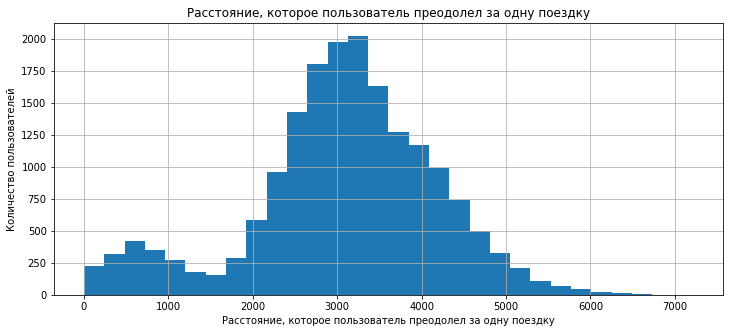

In [28]:
#построим гистограмму по расстоянию, которое пользователь преодолел за одну поездку
rides_go['distance'].hist(bins=30, figsize=(12, 5))
plt.title('Расстояние, которое пользователь преодолел за одну поездку')
plt.xlabel('Расстояние, которое пользователь преодолел за одну поездку')
plt.ylabel('Количество пользователей')
plt.show()

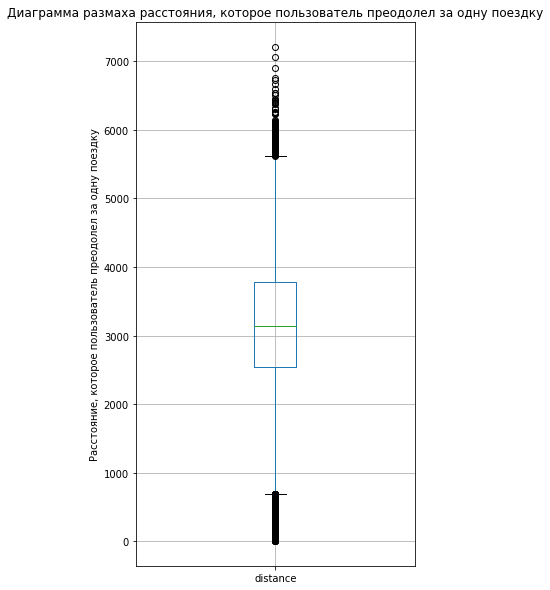

In [29]:
#построим диаграмму размаха 
rides_go.boxplot('distance', figsize=(5, 10))
plt.title('Диаграмма размаха расстояния, которое пользователь преодолел за одну поездку')
plt.ylabel('Расстояние, которое пользователь преодолел за одну поездку')
plt.show()

Исходя из построенных графиков, можно сделать вывод, что основной диапазон значений расстояния, которое пользователь преодолел за одну поездку, лежит в пределах от примерно 700 метров до 5600 метров, за этими пределами выбросы. Чаще всего длина одной поездки составляет от 2,5 км до 3,8 км. На гистограмме видим два локальных максимума, на короткой дистанции - примерно 700 метров проехали около 400 пользователей, и на длинной - около 3,3 км проехали более 2000 пользователей.

##### Продолжительность поездок

Построим гистограмму и диаграмму размаха продолжительности поездок.

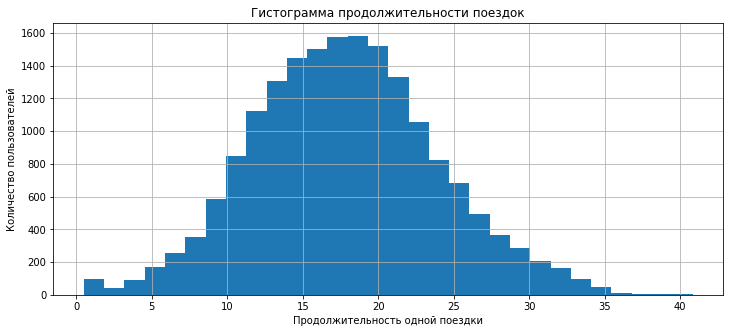

In [30]:
#построим гистограмму продолжительности поездок
rides_go['duration'].hist(bins=30, figsize=(12, 5))
plt.title('Гистограмма продолжительности поездок')
plt.xlabel('Продолжительность одной поездки')
plt.ylabel('Количество пользователей')
plt.show()

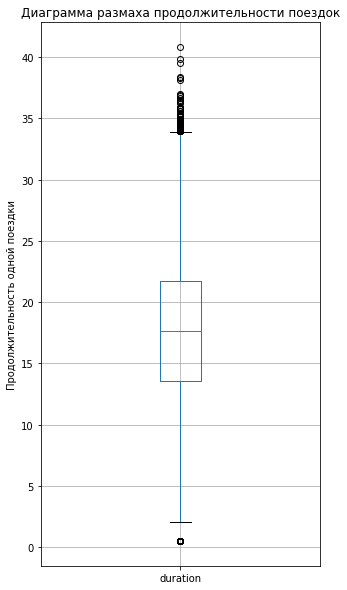

In [31]:
#построим диаграмму размаха 
rides_go.boxplot('duration', figsize=(5, 10))
plt.title('Диаграмма размаха продолжительности поездок')
plt.ylabel('Продолжительность одной поездки')
plt.show()

Распределение продолжительности поездок является нормальным распределением. До диаграмме размаха видно, что основной диапазон значений примерно от 2 до 34 минут. Чаще всего поездки длятся около 14 - 22 минут. На гисторгамме видно аномальное время поездок порядка 100 с временем менее 1 минуты. Построенная гисторгама указывают, что в столбце времени присутствуют аномалии.
Не смотря на такую низкую продолжительность поездки, эти данные удалять не рекомендуется, так как в дальнейшем производится расчет выручки, которая определяет финансовый результат Сервиса аранды самокатов. Например, пользователь без подписки оплачивает фиксированную сумму только за старт поездки.

#### Шаг 4. Объединение данных

Объединим данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуемся методом merge().

In [32]:
#объединим данные о пользователях и поездках методом merge() и выведем первые 5 строк объединенного датафрейма
general = users_go.merge(rides_go, on='user_id', how='outer')
general.head(5)

,user_id,name,age,city,subscription_type,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,4409.92,25.599769,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,2617.59,15.816871,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,754.16,6.232113,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,2694.78,18.511000,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,4028.69,26.265803,2021-08-28,8


In [33]:
#объединим данные о пользователях, поездках и подписках и выведем первые 5 строк
general = general.merge(subscriptions_go, on='subscription_type', how='outer')
general.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,26.265803,2021-08-28,8,6,0,199


In [34]:
#выведем общую информацию о датафрейме
general.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


Из общей информации видим, что пропуски в созданном нами датаффрейме отсутствуют.

Создадим датафрейм с данными о пользователях без подписки и визуализируем данные о расстоянии и времени поездок для пользователей этой категории.

In [35]:
#создадим датафрейм с данными о пользователях без подписки с помощью метода query()
users_free = general.query('subscription_type == "free"')
users_free.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.69,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.93,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.43,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.91,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.38,17.427673,2021-02-14,2,8,50,0


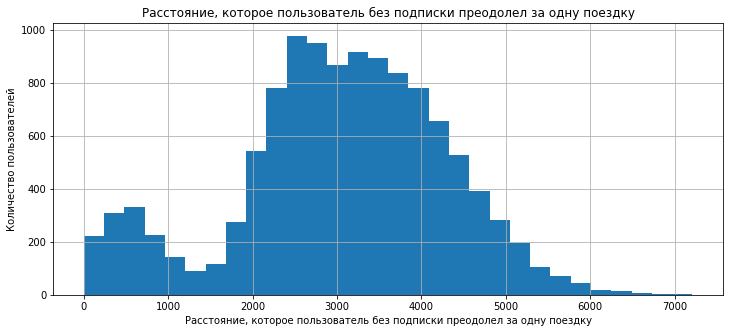

In [36]:
#построим гистограмму по расстоянию, которое пользователь без подписки преодолел за одну поездку
users_free['distance'].hist(bins=30, figsize=(12, 5))
plt.title('Расстояние, которое пользователь без подписки преодолел за одну поездку')
plt.xlabel('Расстояние, которое пользователь без подписки преодолел за одну поездку')
plt.ylabel('Количество пользователей')
plt.show()

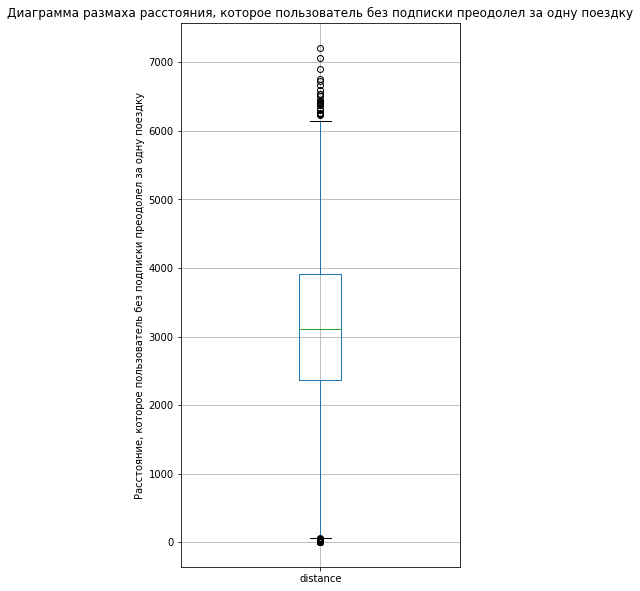

In [37]:
#построим диаграмму размаха расстояний пользователей без подписки
users_free.boxplot('distance', figsize=(5, 10))
plt.title('Диаграмма размаха расстояния, которое пользователь без подписки преодолел за одну поездку')
plt.ylabel('Расстояние, которое пользователь без подписки преодолел за одну поездку')
plt.show()

Исходя из построенных графиков, делаем вывод, что основной диапазон значений расстояния, которое пользователь без подписки преодолел за одну поездку, лежит в пределах от примерно 50 метров до 6100 метров, за этими пределами выбросы. Чаще всего длина одной поездки составляет от 2,3 км до 3,9 км. 

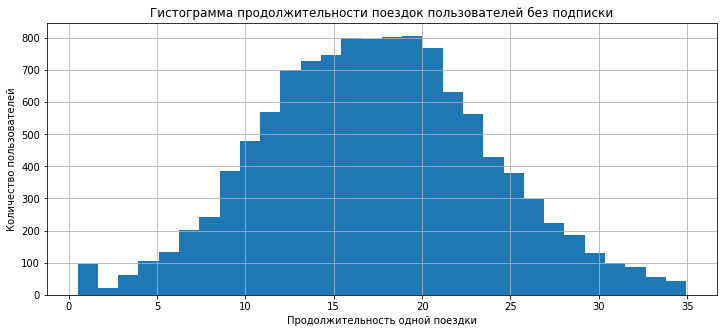

In [38]:
#построим гистограмму продолжительности поездок пользователей без подписки
users_free['duration'].hist(bins=30, figsize=(12, 5))
plt.title('Гистограмма продолжительности поездок пользователей без подписки')
plt.xlabel('Продолжительность одной поездки')
plt.ylabel('Количество пользователей')
plt.show()

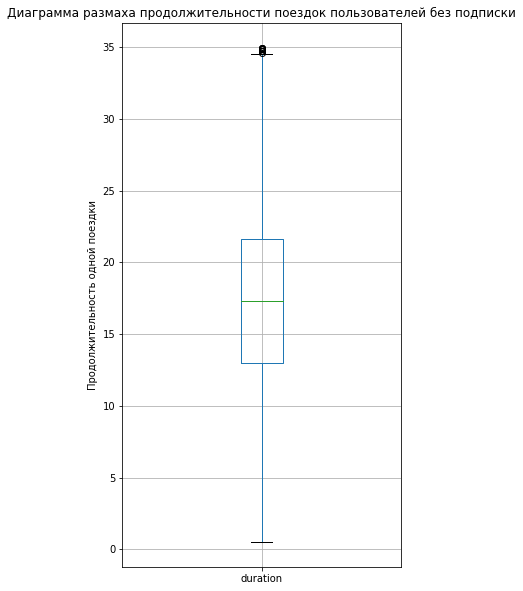

In [39]:
#построим диаграмму размаха времени в пути пользователей без подписки
users_free.boxplot('duration', figsize=(5, 10))
plt.title('Диаграмма размаха продолжительности поездок пользователей без подписки')
plt.ylabel('Продолжительность одной поездки')
plt.show()

Распределение продолжительности поездок похоже на нормальное распределение. До диаграмме размаха видно, что основной диапазон значений примерно от минуты до 34 минут. Чаще всего поездки длятся около 13 - 22 минут.

In [40]:
#создадим датафрейм с данными о пользователях с подпиской с помощью метода query()
users_ultra = general.query('subscription_type == "ultra"')
users_ultra.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,26.265803,2021-08-28,8,6,0,199


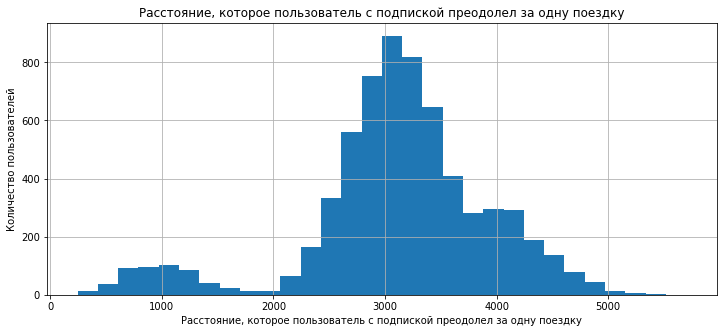

In [41]:
#построим гистограмму по расстоянию, которое пользователь с подпиской преодолел за одну поездку
users_ultra['distance'].hist(bins=30, figsize=(12, 5))
plt.title('Расстояние, которое пользователь с подпиской преодолел за одну поездку')
plt.xlabel('Расстояние, которое пользователь с подпиской преодолел за одну поездку')
plt.ylabel('Количество пользователей')
plt.show()

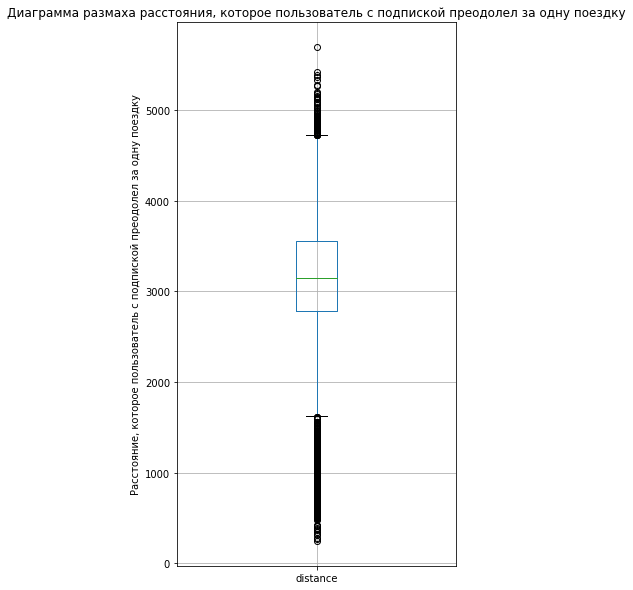

In [42]:
#построим диаграмму размаха расстояний пользователей с подпиской
users_ultra.boxplot('distance', figsize=(5, 10))
plt.title('Диаграмма размаха расстояния, которое пользователь с подпиской преодолел за одну поездку')
plt.ylabel('Расстояние, которое пользователь с подпиской преодолел за одну поездку')
plt.show()

По построенной гистограмме и диаграмме размаха видим, что основной диапазон значений расстояния, которое пользователь с подпиской преодолел за одну поездку, лежит в пределах от примерно 1,6 км до 4,7 км, за этими пределами выбросы. Чаще всего длина одной поездки составляет от 2,8 км до 3,6 км. 
Можем сделать вывод, что пользователи с подпиской в основном берут самокат на более длительные расстояния, в то время как пользователи без подписки, у которых расстояния одной поездки начинаются с 50 метров, бывает берут самокат, чтобы попробовать.

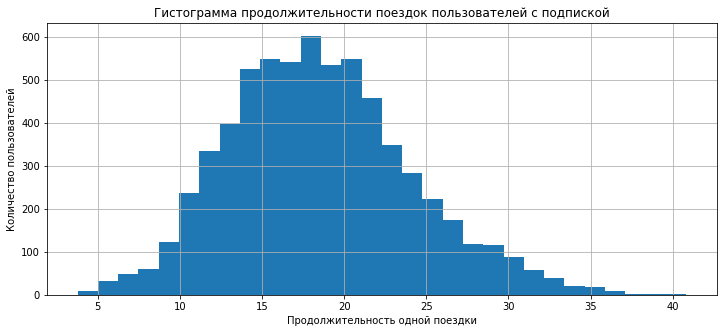

In [43]:
#построим гистограмму продолжительности поездок пользователей с подпиской
users_ultra['duration'].hist(bins=30, figsize=(12, 5))
plt.title('Гистограмма продолжительности поездок пользователей с подпиской')
plt.xlabel('Продолжительность одной поездки')
plt.ylabel('Количество пользователей')
plt.show()

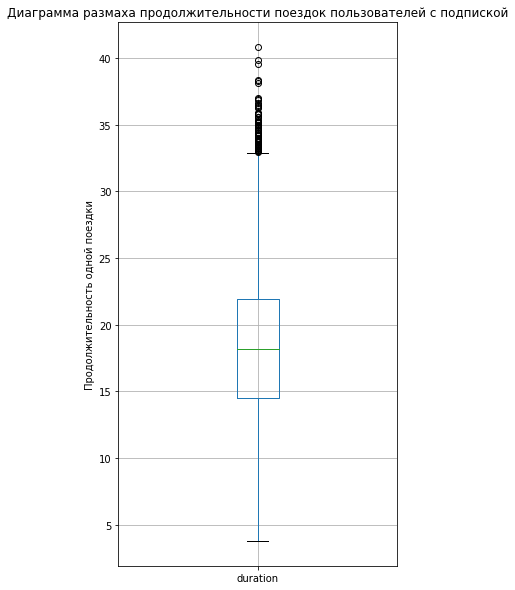

In [44]:
#построим диаграмму размаха времени в пути пользователей с подпиской
users_ultra.boxplot('duration', figsize=(5, 10))
plt.title('Диаграмма размаха продолжительности поездок пользователей с подпиской')
plt.ylabel('Продолжительность одной поездки')
plt.show()

Распределение продолжительности поездок пользователей с подпиской - нормальное распределение. До диаграмме размаха видим, что основной диапазон значений примерно от 3 минут до 33 минут. Чаще всего поездки длятся около 14 - 22 минут. 
По продолжительности поездок данные пользователй без подписки и пользователй с подпиской очень близки друг к другу.

#### Шаг 5. Подсчёт выручки

Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округлим до следующего целого числа.

In [45]:
# каждое значение из столбца duration округляется с помощью «потолка»: 
general['duration'] = np.ceil(general['duration']) 
general.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,27.0,2021-08-28,8,6,0,199


In [46]:
#создадим сводную таблицу методом pivot_table, где посчитаем количество поездок и сумму расстояний и времени для каждого пользователя
#так же в сводную таблицу включим информацию о тарифах
#выведем первые пять строчек на экран
revenue_users = general.pivot_table(index={'user_id', 'month'}, values={'distance', 'duration', 'minute_price', 'start_ride_price', 'subscription_fee'}, aggfunc={'sum', 'count', 'mean'})
revenue_users.head()

distance                    duration             minute_price  \
                 count      mean      sum    count  mean   sum        count   
month user_id                                                                 
1     1              2  3513.755  7027.51        2  21.0  42.0            2   
      3              1  3061.780  3061.78        1  13.0  13.0            1   
      5              1  3914.650  3914.65        1  13.0  13.0            1   
      7              2  3239.040  6478.08        2  14.0  28.0            2   
      12             1  3577.150  3577.15        1  33.0  33.0            1   

                       start_ride_price          subscription_fee            
              mean sum            count mean sum            count mean  sum  
month user_id                                                                
1     1          6  12                2    0   0                2  199  398  
      3          6   6                1    0   0                1  199  199  
      5          6   6                1    0   0                1  199  199  
      7          6  12                2    0   0                2  199  398  
      12         6   6                1    0   0                1  199  199

In [47]:
#переименуем столбцы и удалим лишние столбцы
#выведем первые пять строчек на экран
revenue_users.columns = ['rides_count', 'drop1', 'sum_distance', 'drop2', 'drop3', 'sum_duration', 'drop4', 'minute_price', 'drop5', 'drop6', 'start_ride_price', 'drop7', 'drop8', 'subscription_fee', 'drop9']
revenue_users = revenue_users.drop(['drop1', 'drop2', 'drop3', 'drop4', 'drop5', 'drop6', 'drop7', 'drop8', 'drop9'], axis=1)
revenue_users.head()

rides_count  sum_distance  sum_duration  minute_price  \
month user_id                                                          
1     1                  2       7027.51          42.0             6   
      3                  1       3061.78          13.0             6   
      5                  1       3914.65          13.0             6   
      7                  2       6478.08          28.0             6   
      12                 1       3577.15          33.0             6   

               start_ride_price  subscription_fee  
month user_id                                      
1     1                       0               199  
      3                       0               199  
      5                       0               199  
      7                       0               199  
      12                      0               199

In [48]:
#выведем общую информацию о датафрейме
revenue_users.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 11331 entries, (1, 1) to (12, 1534)
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rides_count       11331 non-null  int64  
 1   sum_distance      11331 non-null  float64
 2   sum_duration      11331 non-null  float64
 3   minute_price      11331 non-null  int64  
 4   start_ride_price  11331 non-null  int64  
 5   subscription_fee  11331 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 576.5 KB


Пропуски в данном датафрейме отсутствуют, поэтому можем продолжить работу. В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратимся к информации об условиях оплаты для подписчиков и тех, у кого нет подписки.
Помесячная выручка считается по формуле: стоимость старта поездки × количество поездок + стоимость одной минуты поездки × общая продолжительность всех поездок в минутах + стоимость подписки.

In [49]:
#добавим новый столбец в датафрейм 
revenue_users['revenue'] = revenue_users['rides_count'] * revenue_users['start_ride_price'] + revenue_users['minute_price'] * revenue_users['sum_duration'] + revenue_users['subscription_fee']
revenue_users.head()

rides_count  sum_distance  sum_duration  minute_price  \
month user_id                                                          
1     1                  2       7027.51          42.0             6   
      3                  1       3061.78          13.0             6   
      5                  1       3914.65          13.0             6   
      7                  2       6478.08          28.0             6   
      12                 1       3577.15          33.0             6   

               start_ride_price  subscription_fee  revenue  
month user_id                                               
1     1                       0               199    451.0  
      3                       0               199    277.0  
      5                       0               199    277.0  
      7                       0               199    367.0  
      12                      0               199    397.0

Найдем общую выручку аренды самокатов за выгруженный период.

In [50]:
#общая выручка аренды самокатов
revenue_users['revenue'].sum()

3878641.0

In [51]:
# Контроль суммы выручки
tmp = revenue_users.copy()
print("Правильное значение суммы выручки 3878641, сумма выручки расчитанная в таблице:", tmp.revenue.sum())

Правильное значение суммы выручки 3878641, сумма выручки расчитанная в таблице: 3878641.0


Общая выручка сервиса аренды самокатов за предоставленный нам период составила 3878641 рубль.

#### Шаг 6. Проверка гипотез

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.

##### Гипотеза 1

Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. 
Выдвинем гипотезы:

Н0: Средняя продолжительность поездок пользователей с подпиской равна средней продолжительности поездок пользователей без подписки

Н1: Средняя продолжительность поездок пользователей с подпиской больше среднtй продолжительности поездок пользователей без подписки

Используем исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.
Так как мы имеем дело с односторонней гипотезой используем метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей scipy.stats.ttest_ind(array1, array2, equal_var, alternative)

In [52]:
#проверим гипотезу о равенстве двух средних совокупностей users_ultra и users_free

alpha = 0.05 # уровень статистической значимости
results = st.ttest_ind(users_ultra['duration'], users_free['duration'], alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


Выведем на экран средние значения времени поездок пользователей с подпиской и без.

In [53]:
display('Среднее время поездок пользователей с подпиской:', users_ultra['duration'].mean())
display('Среднее время поездок пользователей без подписки:', users_free['duration'].mean())

'Среднее время поездок пользователей с подпиской:'

18.54198516280583

'Среднее время поездок пользователей без подписки:'

17.39090929866399

Нулевая гипотеза отвергнута, значит можем предполагать, что пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки. Выведенные средние значения времени поездок пользователей с подпиской и без подстверждают наше предположение.

##### Гипотеза 2

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 
Выдвенем гипотезы:

Н0: Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, равно 3130 метров.

Н1: Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, больше 3130 метров.

Проверим данные гипотезы методом st.ttest_1samp().

In [54]:
#проверим гипотезу о равенстве двух средних совокупностей users_ultra и users_free
optimal_distance = 3130
alpha = 0.05
results = st.ttest_1samp(users_ultra['distance'], optimal_distance, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.9195362605842414
Не получилось отвергнуть нулевую гипотезу


Нулевую гипотезу отвергнуть не удалось, значит мы можем предполагать, что среднее расстояние, которое пользователи с подпиской проезжают за одну поездку, при уровне статистической значимости в 5% не превышает оптимального расстояния в 3130 метров с точки зрения износа.

##### Гипотеза 3

Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.
Выдвенем гипотезы: 

H0: Средняя месячная выручка от пользователей с подпиской равна средней месячной выручке от пользователей без подписки

H1: Средняя месячная выручка от пользователей с подпиской выше средней месячной выручки от пользователей без подписки

Мы снова имеем дело с односторонней гипотезой используем метод для проверки гипотезы scipy.stats.ttest_ind(array1, array2, equal_var, alternative)

In [55]:
alpha = 0.05 # уровень статистической значимости
results = st.ttest_ind(
    revenue_users.loc[revenue_users['subscription_fee'] == 199, 'revenue'], 
    revenue_users.loc[revenue_users['subscription_fee'] == 0, 'revenue'], 
    alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


Выведем на экран средние значения выручки пользователей с подпиской и без, используя метод *mean()*

In [56]:
display('Среднее время поездок пользователей с подпиской:', revenue_users.loc[revenue_users['subscription_fee'] == 199, 'revenue'].mean())
display('Среднее время поездок пользователей без подписки:', revenue_users.loc[revenue_users['subscription_fee'] == 0, 'revenue'].mean())

'Среднее время поездок пользователей с подпиской:'

362.7921906022502

'Среднее время поездок пользователей без подписки:'

328.6413651073845

Нулевая гипотеза отвергнута, значит у нас есть основание полагать, что при уровне статистической значимости в 5% помесячная выручка от пользователей с подпиской выше помесячной выручки от пользователей без подписки. Наши рассуждения подтверждают выведенные значения средней выручки пользователей с подпиской и без. 

#####  Представим ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. 

При такой ситуации мы имеем две зависимые (парные) выборки, так как мы проверяем гипотезы о равенстве среднего генеральной совокупности до и после изменения.Следовательно в данном случае стоит применить метод scipy.stats.ttest_rel(), при проверке на то что, истинное среднее значение генеральной выборки до изменения больше, чем истинное среднее значение генеральной совокупности после изменения, это односторонняя гипотеза, следует указать alternative="less".

#### Шаг 7. Общий вывод

В процессе исследования данных о пользователях популярного сервиса аренды самокатов 'GoFast' были выполнены работы по предобработке данных: столбец *date* приведен к корректному типу данных, удалены дубликаты. 
Из исследовательского анализа данных мы сделали выводы, что: 

    - самый полулярный город сервиса - это Пятигорск, самый непопулярный - Москва 
    - количество пользователей без подписки 54,4% превышает количество пользователей с подпиской ultra 45,6%
    - самокаты популярнее всего у пользователей в возрасте от 22 до 28 лет, при этом на гистограмме видно, что медиана - 25-лет, а основную аудиторию сервиса аренды самокатов GoFast составляют пользователи примерно от 12 (это минимум) до 37 лет. Средний возраст и медиана практически совпадают. Среди пользователей некоторым менее 18 лет,  именно с этого возраста разрешен прокат самокатов. В некоторых компаниях и регионах разрешено с 14 лет, но при письменном согласии родителей. В датасете минимальный возраст 12 лет, это явное нарушение существующих норм.Гистограмма возраста пользователей является нормальным распределение.
    - основной диапазон значений расстояния, которое пользователь преодолел за одну поездку, лежит в пределах от примерно 700 метров до 5600 метров, за этими пределами выбросы. Чаще всего длина одной поездки составляет от 2,5 км до 3,8 км
    - основной диапазон значений продолжительности поездок примерно от 2 до 34 минут. Чаще всего поездки длятся около 14 - 22 минут. На гисторгамме видно аномальное время поездок порядка 100 с временем менее 1 минуты. Построенная гисторгама указывают, что в столбце времени присутствуют аномалии.Не смотря на такую низкую продолжительность поездки, эти данные удалять не рекомендуется, так как в дальнейшем производится расчет выручки, которая определяет финансовый результат Сервиса аранды самокатов. Например, пользователь без подписки оплачивает фиксированную сумму только за старт поездки. Более того, эти аномально низкие поездки имеют достаточное расстояние поездки, которое то же будет анализироваться далее. О данной аномалии необходимо указать владельцам проката для устранения.
    
В исследовании были созданы датафреймы с данными о пользователях без подписки и с подпиской. по визуализации данных датафреймов мы сделали вывод, что пользователи с подпиской в основном берут самокат на более длительные расстояния, в то время как пользователи без подписки, у которых расстояния одной поездки начинаются с 50 метров, бывает берут самокат, чтобы попробовать. По продолжительности поездок данные пользователй без подписки и пользователй с подпиской очень близки друг к другу.

В работе мы посчитали общую выручку сервиса аренды самокатов за предоставленный нам период, она составила 3878641 рубль.
В исследовании мы проверили три гипотезы, кратние выводы такие:

    - можем предполагать, что пользователи с подпиской тратят больше времени на поездки, чем пользователи без подпискию Выведенные средние значения времени поездок пользователей с подпиской и без подстверждают наше предположение.
    - можем предполагать, что среднее расстояние, которое пользователи с подпиской проезжают за одну поездку, при уровне статистической значимости в 5% не превышает оптимального расстояния в 3130 метров с точки зрения износа
    - есть основание полагать, что при уровне статистической значимости в 5% помесячная выручка от пользователей с подпиской выше помесячной выручки от пользователей без подписки. Наши рассуждения подтверждают выведенные значения средней выручки пользователей с подпиской и без.
    
Общий вывод работы: пользователи с подпиской являются более выгодными клиентами для сервиса аренды самокатов.